<a href="https://colab.research.google.com/github/sri-mathi/API_FETCH/blob/main/AMLMini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import glob
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls "/content/drive/My Drive/val/not_fallen"

'not fallen001.jpg'  'not fallen015.jpg'  'not fallen029.png'
'not fallen002.jpg'  'not fallen016.jpg'  'not fallen030.png'
'not fallen003.jpg'  'not fallen017.jpg'  'not fallen031.png'
'not fallen004.jpg'  'not fallen018.jpg'  'not fallen032.png'
'not fallen005.jpg'  'not fallen019.jpg'  'not fallen033.png'
'not fallen006.jpg'  'not fallen020.png'  'not fallen034.png'
'not fallen007.jpg'  'not fallen021.png'  'not fallen035.png'
'not fallen008.jpg'  'not fallen022.png'  'not fallen036.png'
'not fallen009.jpg'  'not fallen023.png'  'not fallen037.png'
'not fallen010.jpg'  'not fallen024.png'  'not fallen038.png'
'not fallen011.jpg'  'not fallen025.png'  'not fallen039.png'
'not fallen012.jpg'  'not fallen026.png'  'not fallen040.png'
'not fallen013.jpg'  'not fallen027.png'  'not fallen041.png'
'not fallen014.jpg'  'not fallen028.png'


In [4]:
from skimage.feature import hog
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.image as mpimg

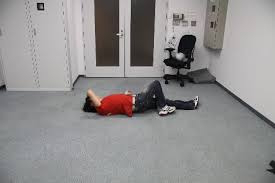

In [5]:
from PIL import Image
im = Image.open('/content/drive/My Drive/train/fall/fall001.jpg')
im.show()

<class 'numpy.ndarray'>
image: (183, 275, 3)


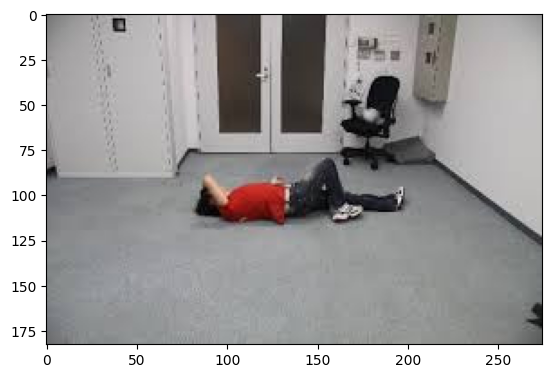

In [6]:
from numpy import asarray
img=asarray(im)
print(type(img))
print('image:',img.shape)
plt.imshow(img)
plt.show()

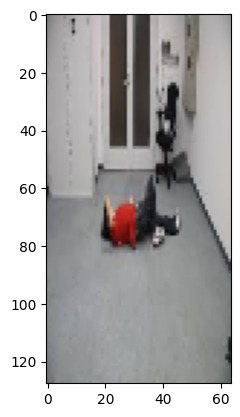

(128, 64, 3)


In [7]:
resized_img=cv2.resize(img,(64,128))
plt.imshow(resized_img)
plt.show()
print(resized_img.shape)

(6804,)
[0.26117252 0.01593269 0.00511578 ... 0.         0.20464801 0.0604289 ]
(128, 64)


<ipython-input-8-096f1c07ca9d>:1: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd,hog_image=hog(resized_img,visualize=True,multichannel=True)


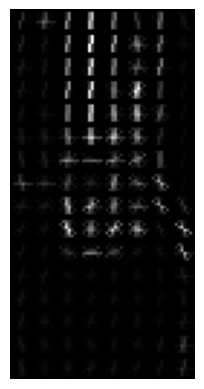

In [8]:
fd,hog_image=hog(resized_img,visualize=True,multichannel=True)
print(fd.shape)
print(fd)
print(hog_image.shape)
plt.axis("off")
plt.imshow(hog_image,cmap="gray")
plt.show()

In [9]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence

from sklearn.utils import shuffle as shf
import pickle
import os
import glob as gb

In [10]:
code = {'fall':0 ,'not _fallen':1}
def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x

In [11]:
trainpath='/content/drive/My Drive/train/'
X_train = []
y_train = []
for folder in  os.listdir(trainpath) : 
    files = gb.glob(pathname= str( trainpath + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (64,64))
        X_train.append(list(image_array))
        y_train.append(code[folder])
np.save('X_train',X_train)
np.save('y_train',y_train)

In [12]:
code = {'fall':0 ,'not_fallen':1}
def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x

In [13]:
testpath='/content/drive/My Drive/val/'
X_test = []
y_test = []
for folder in  os.listdir(testpath) : 
    files = gb.glob(pathname= str( testpath + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (64,64))
        X_test.append(list(image_array))
        y_test.append(code[folder])
np.save('X_test',X_test)
np.save('y_test',y_test)

In [14]:
loaded_X_train = np.load('./X_train.npy')
loaded_X_test = np.load('./X_test.npy')
loaded_y_train = np.load('./y_train.npy')
loaded_y_test = np.load('./y_test.npy')

In [15]:
print(loaded_y_train.shape)
print(loaded_y_test.shape)

(374,)
(89,)


In [16]:
print(loaded_X_train.shape)
print(loaded_X_test.shape)

(374, 64, 64, 3)
(89, 64, 64, 3)


In [17]:
X_train = loaded_X_train.reshape([-1, np.product((64,64,3))])
X_test = loaded_X_test.reshape([-1, np.product((64,64,3))])

In [18]:
X_train, y_train = shf(X_train, y_train, random_state=15)
X_test, y_test = shf(X_test, y_test, random_state=15)

In [19]:
X_train.shape

(374, 12288)

In [20]:
y_train = loaded_y_train
y_test = loaded_y_test

In [21]:
from tensorflow.keras.layers import Bidirectional
tf.random.set_seed(7)
top_words = 5000
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           160000    
                                                                 
 bidirectional (Bidirectiona  (None, 200)              106400    
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 266,601
Trainable params: 266,601
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/3
6/6 [==============================] - 25s 3s/step - loss: 0.6911 - accuracy: 0.5374 - val_loss: 0.6629 - val_accuracy: 0.7865
Epoch 2/3
6/6 [==============================] - 17s 3s/step - loss: 0.6845 - accuracy: 0.5561 - val_loss:

In [22]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 78.65%


In [23]:
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D

In [24]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

model = Sequential()
model.add(SimpleRNN(units=64, input_shape=(None, 1)))  
model.add(Dense(units=1, activation='sigmoid')) 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train,y_train, epochs=25, batch_size=32)
loss, accuracy = model.evaluate(X_test, y_test)

Epoch 1/25
12/12 [==============================] - 3s 170ms/step - loss: 0.6882 - accuracy: 0.5401
Epoch 2/25
12/12 [==============================] - 2s 166ms/step - loss: 0.6816 - accuracy: 0.5588
Epoch 3/25
12/12 [==============================] - 1s 76ms/step - loss: 0.6811 - accuracy: 0.5588
Epoch 4/25
12/12 [==============================] - 1s 76ms/step - loss: 0.6792 - accuracy: 0.5588
Epoch 5/25
12/12 [==============================] - 1s 81ms/step - loss: 0.6786 - accuracy: 0.5588
Epoch 6/25
12/12 [==============================] - 1s 76ms/step - loss: 0.6792 - accuracy: 0.5588
Epoch 7/25
12/12 [==============================] - 1s 76ms/step - loss: 0.6774 - accuracy: 0.5588
Epoch 8/25
12/12 [==============================] - 1s 75ms/step - loss: 0.6763 - accuracy: 0.5615
Epoch 9/25
12/12 [==============================] - 1s 76ms/step - loss: 0.6790 - accuracy: 0.5588
Epoch 10/25
12/12 [==============================] - 1s 76ms/step - loss: 0.6751 - accuracy: 0.5588
Epoch 1

In [25]:
print(accuracy)

0.7977527976036072


In [39]:
tf.random.set_seed(3)
top_words = 5000
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)
embedding_vecor_length = 16
model1 = Sequential()
model1.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model1.add(Conv1D(filters=32, kernel_size=4, padding='same', activation='relu'))
model1.add(MaxPooling1D(pool_size=4))
model1.add(LSTM(100))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model1.summary())
model1.fit(X_train, y_train, epochs=3, batch_size=24)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 500, 16)           80000     
                                                                 
 conv1d_6 (Conv1D)           (None, 500, 32)           2080      
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 125, 32)          0         
 1D)                                                             
                                                                 
 lstm_7 (LSTM)               (None, 100)               53200     
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 135,381
Trainable params: 135,381
Non-trainable params: 0
________________________________________________

In [40]:
scores = model1.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 78.65%
